# Machine Learning 
## Data Description

Group 50 Members:

- Clara Pichler, 11917694
- Hannah Knapp, 11901857 
- Niklas Klenner, 11778405

### Overview

1. Data Sets
- Used Data Sets
- Requirements & Dependencies

2. Data Exploration
- Loading in the Data Sets
- Life Expectancy
    - Missing Values
    - Visualizations
- Gym Members Exercise Tracking
    - Missing Values
    - Visualizations




## Data Sets

### Used Datasets

__Life Expectancy:__

- _content_: Global Life Expectancy with Socio-Economic variables 2000-2019
- _timespan_: 2000-2019
- _source_: https://www.kaggle.com/datasets/mjshri23/life-expectancy-and-socio-economic-world-bank?rvi=1


__Gym Member Exercise Tracking Dataset:__
- _content_: A detailed overview of gym members' exercise routines, physical attributes, and fitness metrics
- _source_: https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset 

### Requirements & Dependencies

This project was created using Python 3.12.5 The exact versions of the dependencies can be installed with the following command.

In [ ]:
%pip install -r requirements.txt -q

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.impute import SimpleImputer

## Data Exploration

### Loading in the Data Sets

In [3]:
df_life_exp = pd.read_csv('data/life_expectancy.csv')
df_gym = pd.read_csv('data/gym_members_exercise_tracking.csv')

### Life Expectancy


In [4]:
display(df_life_exp.head(5))
df_life_exp.info(verbose=True)
df_life_exp.describe()

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.0,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.0,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.0,7.139524,3.4587,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.0,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.0,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    3306 non-null   object 
 1   Country Code                    3306 non-null   object 
 2   Region                          3306 non-null   object 
 3   IncomeGroup                     3306 non-null   object 
 4   Year                            3306 non-null   int64  
 5   Life Expectancy World Bank      3118 non-null   float64
 6   Prevelance of Undernourishment  2622 non-null   float64
 7   CO2                             3154 non-null   float64
 8   Health Expenditure %            3126 non-null   float64
 9   Education Expenditure %         2216 non-null   float64
 10  Unemployment                    3002 non-null   float64
 11  Corruption                      975 non-null    float64
 12  Sanitation                      20

,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
count,3306.000000,3118.000000,2622.000000,3.154000e+03,3126.000000,2216.000000,3002.000000,975.000000,2059.000000,3.306000e+03,3.306000e+03,3.306000e+03
mean,2010.000000,69.748362,10.663654,1.574924e+05,6.364059,4.589014,7.890760,2.860513,52.738785,1.318219e+06,4.686289e+06,7.392488e+06
std,5.478054,9.408154,11.285897,7.726415e+05,2.842844,2.119165,6.270832,0.621343,30.126762,5.214068e+06,1.843727e+07,2.932688e+07
min,2001.000000,40.369000,2.500000,1.000000e+01,1.263576,0.850320,0.100000,1.000000,2.377647,4.304900e+02,3.301600e+02,2.481820e+03
25%,2005.000000,63.642000,2.500000,2.002500e+03,4.205443,3.136118,3.733000,2.500000,24.746007,6.245688e+04,5.776475e+04,3.184758e+05
50%,2010.000000,72.168500,6.200000,1.020500e+04,5.892352,4.371465,5.920000,3.000000,49.317481,2.456910e+05,3.147693e+05,1.350146e+06
75%,2015.000000,76.809000,14.775000,5.877250e+04,8.119166,5.519825,10.097500,3.250000,80.278847,8.465591e+05,2.831636e+06,3.918468e+06
max,2019.000000,84.356341,70.900000,1.070722e+07,24.230680,23.270000,37.250000,4.500000,100.000004,5.563676e+07,2.685646e+08,3.246378e+08


In [5]:
display(df_life_exp["Year"].unique())
display(df_life_exp["Country Code"].unique(), len(df_life_exp["Country Code"].unique()))
display(df_life_exp["Region"].unique())
display(df_life_exp["IncomeGroup"].unique())

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

array(['AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATG',
       'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR',
       'BHR', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BTN',
       'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COL',
       'COM', 'CRI', 'CUB', 'CYP', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM',
       'DZA', 'ECU', 'ERI', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA',
       'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GNB', 'GNQ', 'GRC', 'GRD',
       'GRL', 'GTM', 'GUM', 'GUY', 'HND', 'HRV', 'HTI', 'HUN', 'IDN',
       'IND', 'IRL', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN',
       'KAZ', 'KEN', 'KHM', 'KIR', 'KWT', 'LBN', 'LBR', 'LBY', 'LKA',
       'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV',
       'MEX', 'MHL', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MNP',
       'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'NAM', 'NER', 'NGA', 'NIC',
       'NLD', 'NOR', 'NPL', 'NRU', 'NZL', 'OMN', 'PAK', 'PAN', 'PER',
       'PHL', 'PLW',

174

array(['South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia',
       'Middle East & North Africa', 'Latin America & Caribbean',
       'East Asia & Pacific', 'North America'], dtype=object)

array(['Low income', 'Lower middle income', 'Upper middle income',
       'High income'], dtype=object)

Through the above code, we were able to have a first glimpse into the life expectancy dataset. The data ranges from the years 2001 till 2019 and has information about 174 unique countries across the world. The data set has 3306 entries and 16 features. The types of those are not needed to be changed. We mostly want to focus on the feature _Life Expectancy World Bank_, since we want to predict it through regression. 

### Missing Values

Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Year                                 0
Life Expectancy World Bank         188
Prevelance of Undernourishment     684
CO2                                152
Health Expenditure %               180
Education Expenditure %           1090
Unemployment                       304
Corruption                        2331
Sanitation                        1247
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64

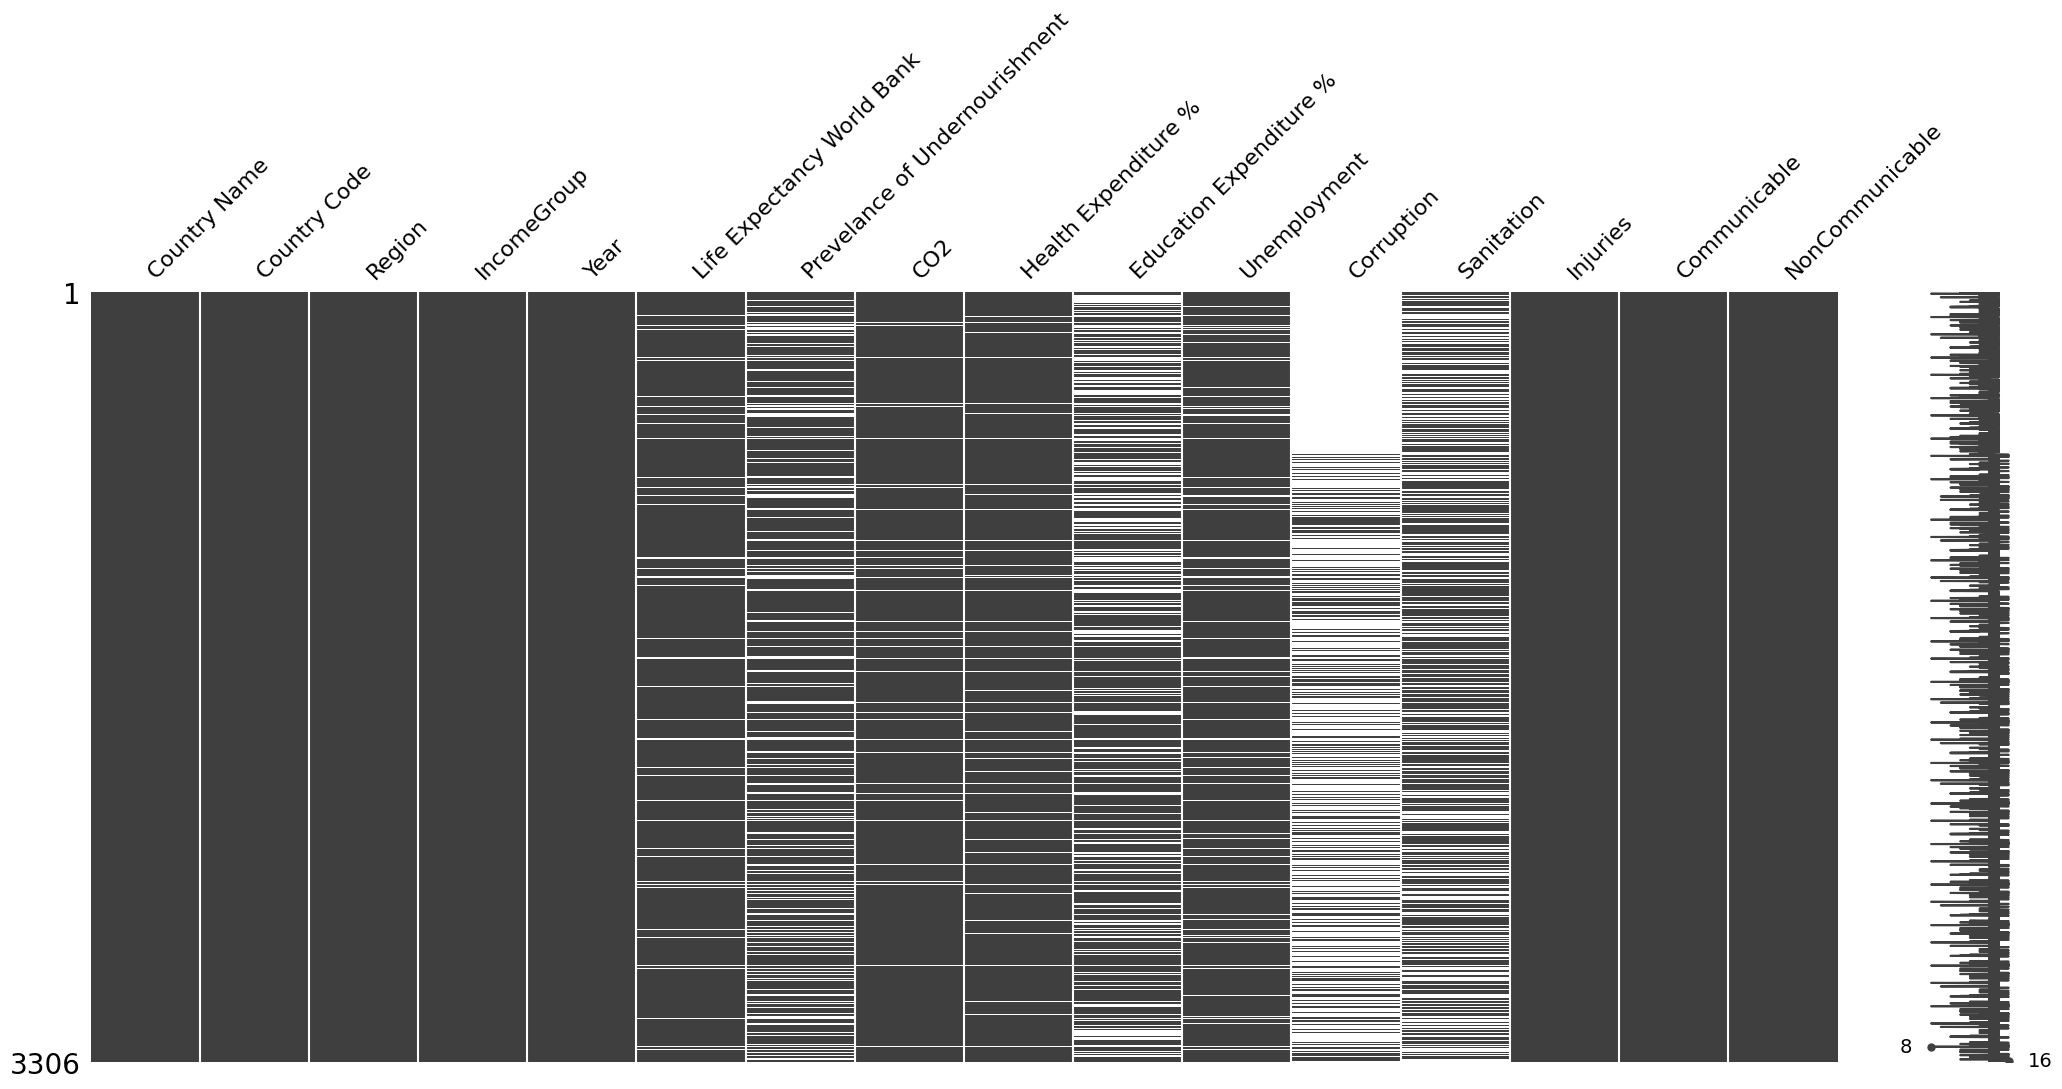

In [6]:
msno.matrix(df_life_exp)
df_life_exp.isna().sum()

There are numerous possibilities to deal with missing values. Although it sounds lazy, __sometimes__ one can just delete a feature or row if it's not worth it to fill the missing values in since the given data is not enough to fill out the missing values correctly, for example `Corruption`. Those preprocessing steps will be discussed in the next assignment though.

### Visualizations

In [7]:
df_life_exp_short = df_life_exp.rename(columns={
    'Country Name': 'CountryName',
    'Country Code': 'CountryCode',
    'Region': 'Region',
    'IncomeGroup': 'Income',
    'Year': 'Year',
    'Life Expectancy World Bank': 'LifeEx',
    'Prevelance of Undernourishment': 'PoU',
    'CO2': 'CO2',
    'Health Expenditure %': 'Health',
    'Education Expenditure %': 'Educ',
    'Unemployment': 'Unempl',
    'Corruption': 'Corrupt',
    'Sanitation': 'Sanitation',
    'Injuries': 'Injuries',
    'Communicable': 'Comm',
    'NonCommunicable': 'NonComm'
})

In [8]:
fig = px.scatter_matrix(df_life_exp_short[df_life_exp_short['Year']==2019],
    dimensions=["LifeEx", "Unempl", "Health", 'Educ', 'PoU', 'CO2'],
    color="Income")
fig.show()

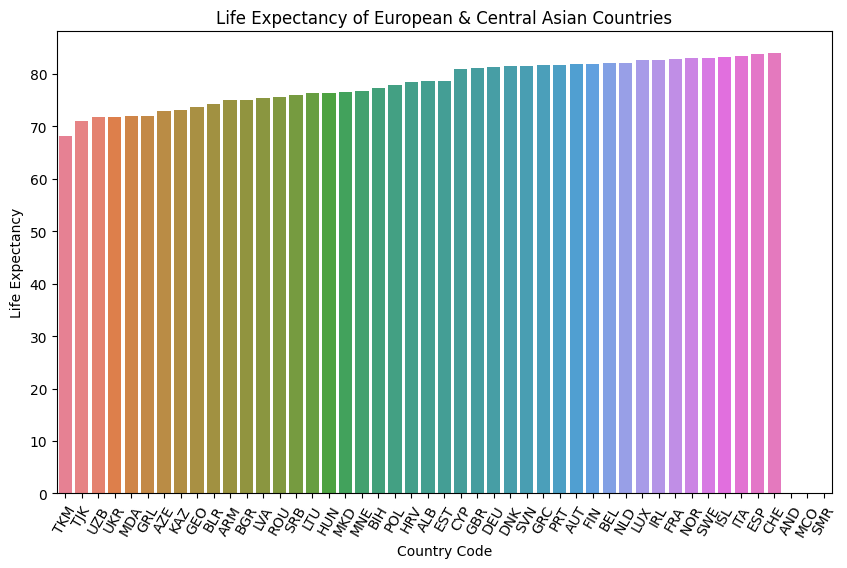

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country Code', y='Life Expectancy World Bank', hue='Country Code', data=df_life_exp[(df_life_exp['Year']==2019) & (df_life_exp['Region']=='Europe & Central Asia')].sort_values('Life Expectancy World Bank'))
plt.title('Life Expectancy of European & Central Asian Countries')
plt.xlabel('Country Code')
plt.ylabel('Life Expectancy')
plt.xticks(rotation=60)
plt.show()

array([[<Axes: title={'center': 'Injuries'}>,
        <Axes: title={'center': 'Communicable'}>],
       [<Axes: title={'center': 'NonCommunicable'}>, <Axes: >]],
      dtype=object)

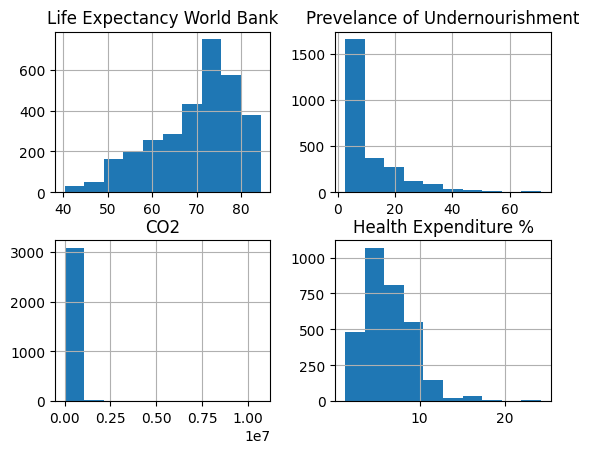

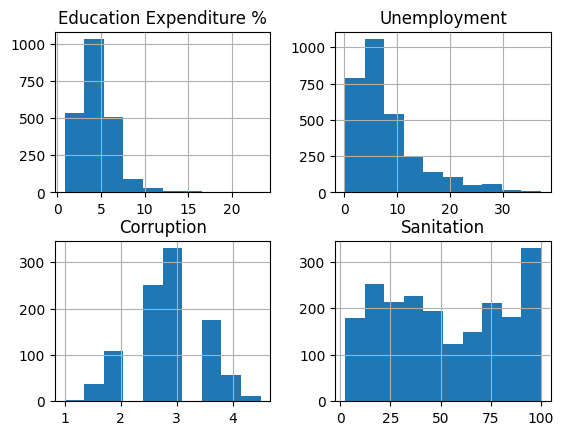

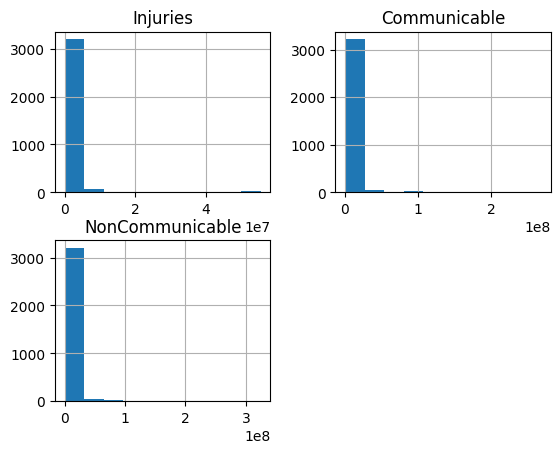

In [11]:
df_life_exp.hist(column=['Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2', 'Health Expenditure %'])
df_life_exp.hist(column=['Education Expenditure %', 'Unemployment', 'Corruption', 'Sanitation'])
df_life_exp.hist(column=['Injuries', 'Communicable', 'NonCommunicable'])

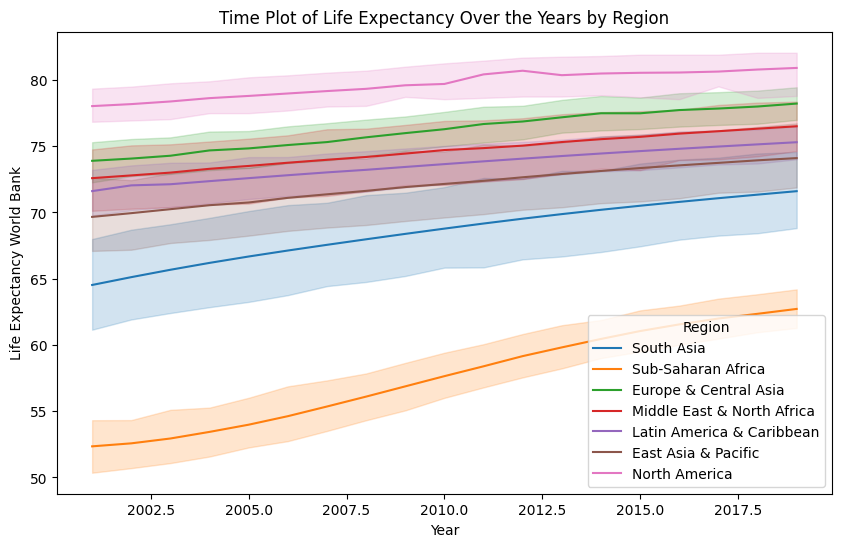

In [33]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Life Expectancy World Bank', hue='Region', data=df_life_exp)
plt.title('Time Plot of Life Expectancy Over the Years by Region')
plt.show()

In [38]:
corrmat_life_exp = df_life_exp.corr(method='pearson', numeric_only=True)

<Axes: >

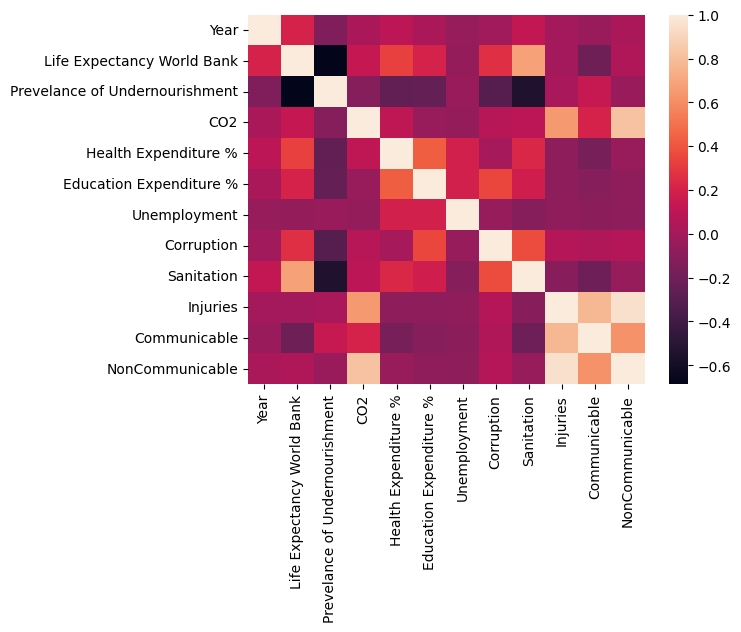

In [39]:
sns.heatmap(corrmat_life_exp)

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country Code', y='Life Expectancy World Bank', hue='Country Code', data=df_life_exp[(df_life_exp['Year']==2019) & (df_life_exp['Region']=='Europe & Central Asia')])
plt.title('Life Expectancy of European & Central Asian Countries')
plt.xlabel('Country Code')
plt.ylabel('Life Expectancy')
plt.xticks(rotation=60)
plt.show()

### Gym Members Exercise Tracking

This data set will be used for the classification part of the assignment. Our target feature will be `Workout_Type`. 

In [12]:
display(df_gym.head(5))
display(df_gym.info(verbose=True))
display(df_gym.describe())

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

None

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [13]:
display(df_gym["Gender"].unique())
display(df_gym["Workout_Type"].unique(), len(df_gym["Workout_Type"].unique()))

for i in df_gym["Workout_Type"].unique() :{
    display(df_gym[df_gym["Workout_Type"]==i]['Age'].count())
}

array(['Male', 'Female'], dtype=object)

array(['Yoga', 'HIIT', 'Cardio', 'Strength'], dtype=object)

4

np.int64(239)

np.int64(221)

np.int64(255)

np.int64(258)

The data set has 973 entries and 15 features where two of them are of the type `object`. Our target feature `Workout_Type`has four unique values: 'Yoga', 'HIIT', 'Cardio' and 'Strength'. Most of the members of the gym do strength training with 258 members, whereas "only" 221 members do HIIT training, however, one must say the number of members are quite nicely divided among the types of workouts. 

### Missing Values

Our luck that we don't have to deal with missing values for this data set.

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

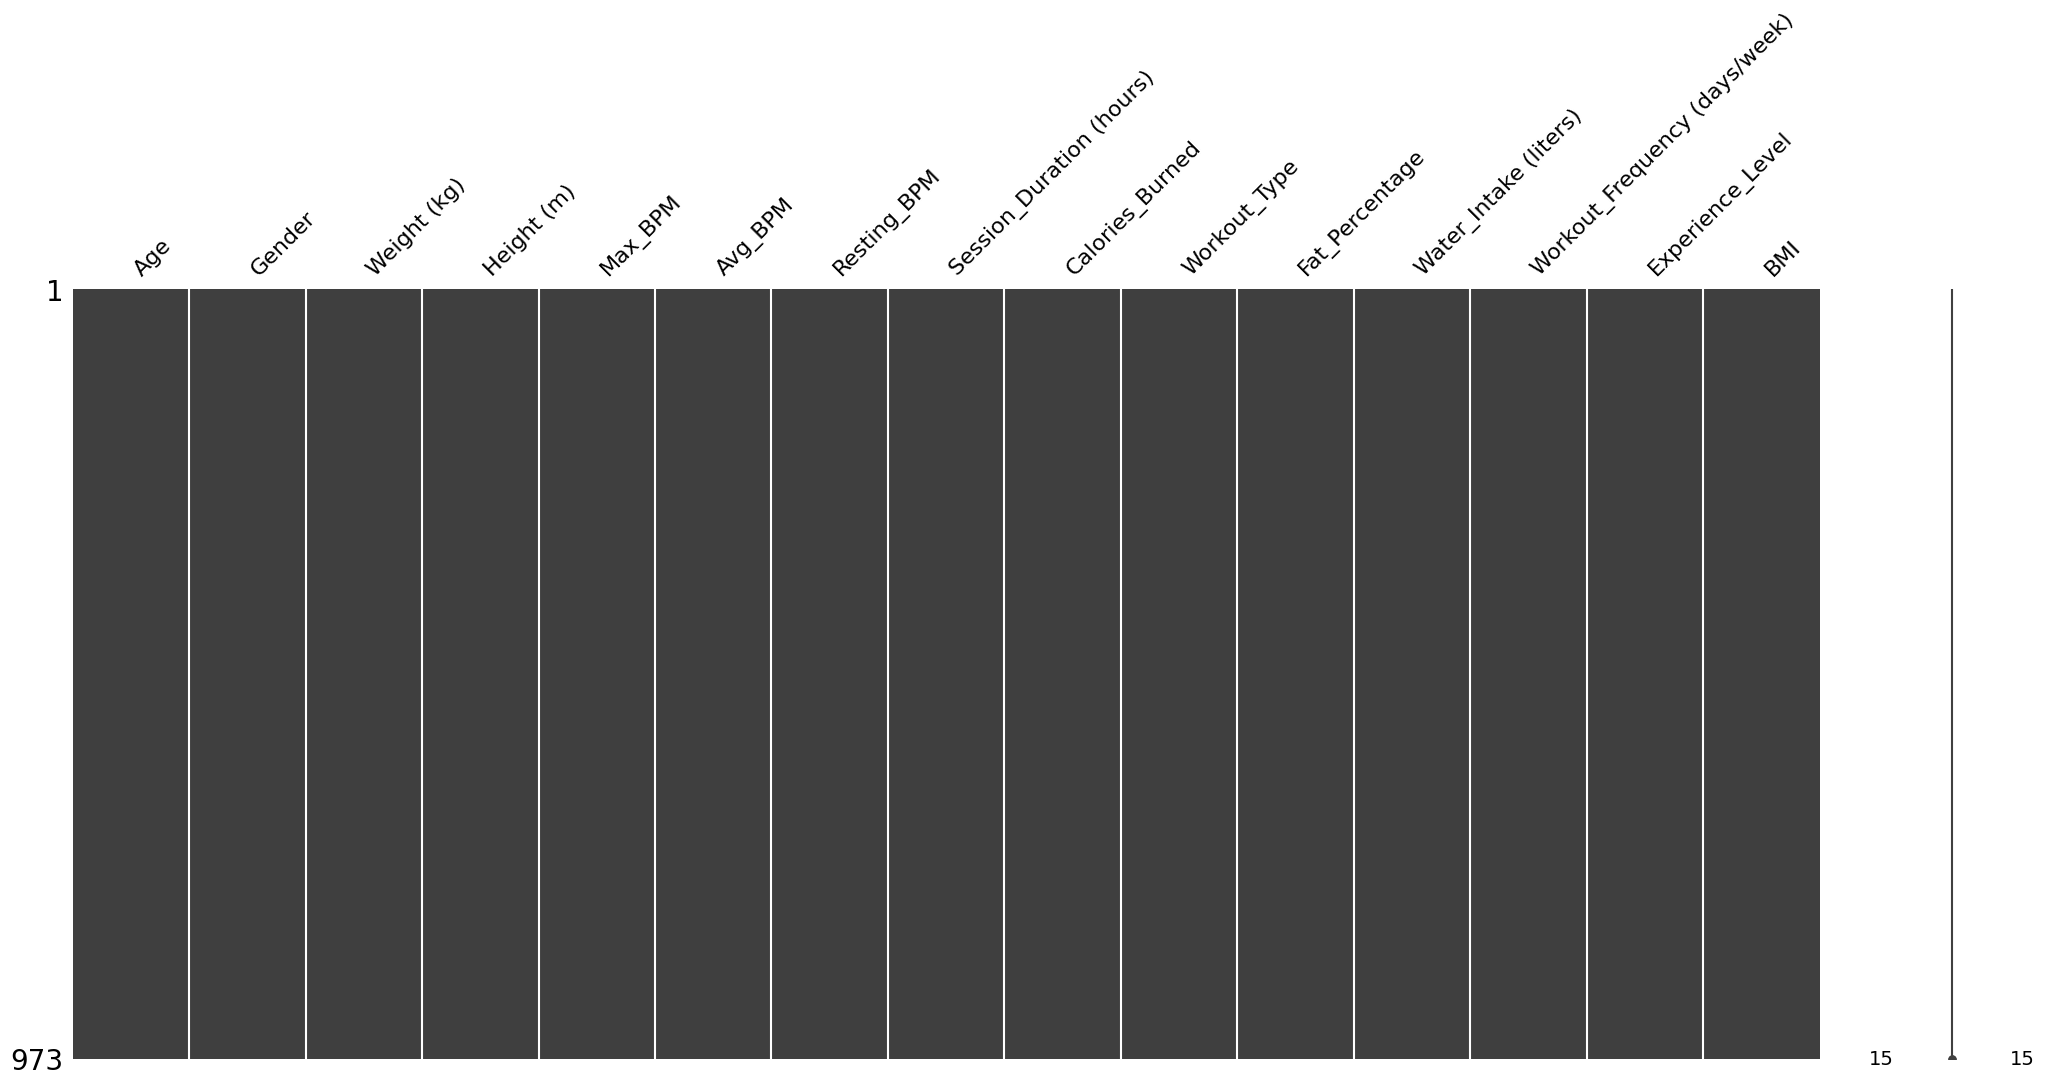

In [14]:
msno.matrix(df_gym)
df_gym.isna().sum()

### Visualizations

In [15]:
df_gym_short = df_gym.rename(columns={
    'Weight (kg)' : 'W', 
    'Height (m)' : 'H', 
    'Resting_BPM' : 'R_BPM', 
    'Session_Duration (hours)' : 'Duration', 
    'Calories_Burned' : 'Calories',
    'Workout_Type' : 'Type', 
    'Fat_Percentage' : 'Fat', 
    'Water_Intake (liters)' : 'Water',
    'Workout_Frequency (days/week)' : 'Frequency', 
    'Experience_Level' : 'Level'
})

In [16]:
fig = px.scatter_matrix(df_gym_short,
    dimensions=['W', 'H', 'Duration', 'Calories', 'Frequency'],
    color="Type")
fig.show()

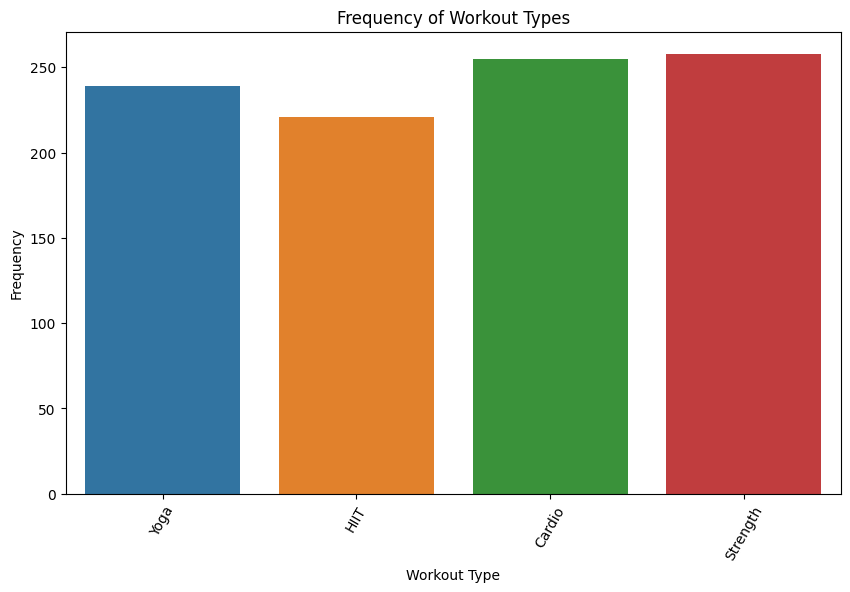

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Workout_Type', hue='Workout_Type', data=df_gym)
plt.title('Frequency of Workout Types')
plt.xlabel('Workout Type')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.show()

In [18]:
corrmat_gym = df_gym.corr(method='pearson', numeric_only=True)

<Axes: >

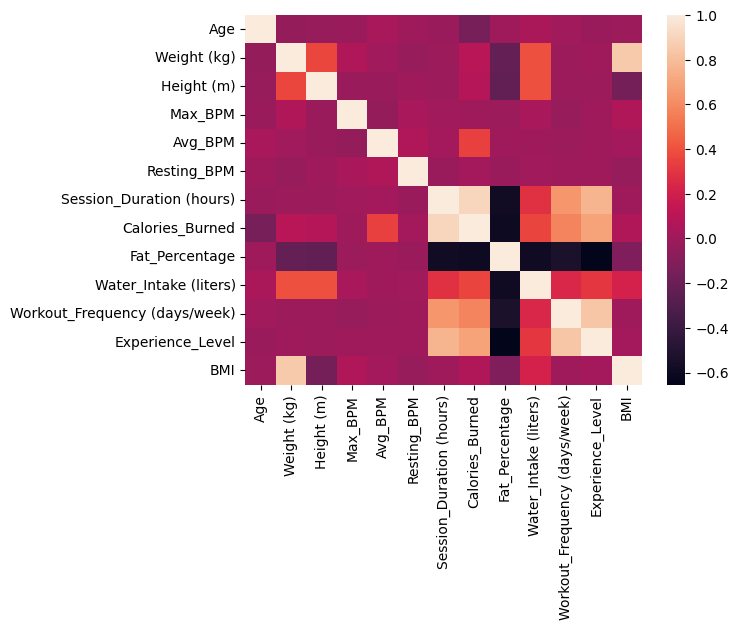

In [19]:
sns.heatmap(corrmat_gym)

array([[<Axes: title={'center': 'Fat_Percentage'}>,
        <Axes: title={'center': 'Water_Intake (liters)'}>],
       [<Axes: title={'center': 'Workout_Frequency (days/week)'}>,
        <Axes: title={'center': 'BMI'}>]], dtype=object)

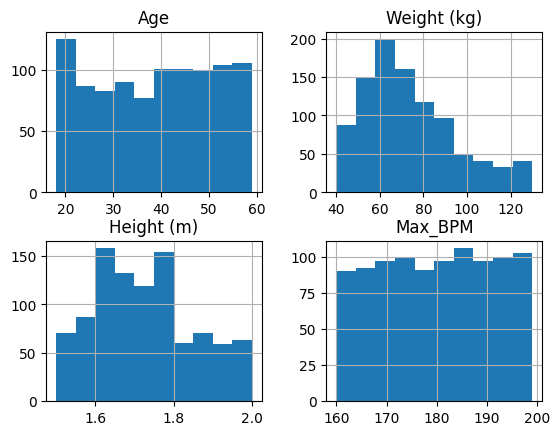

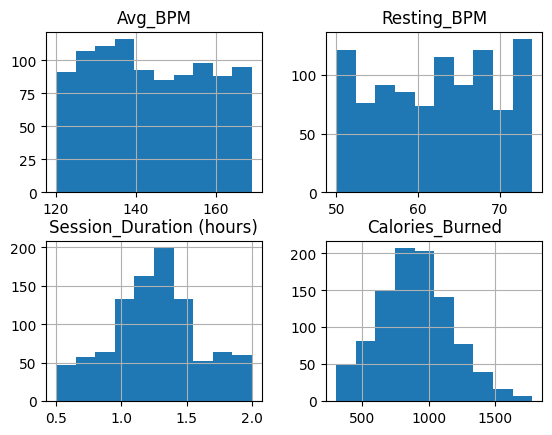

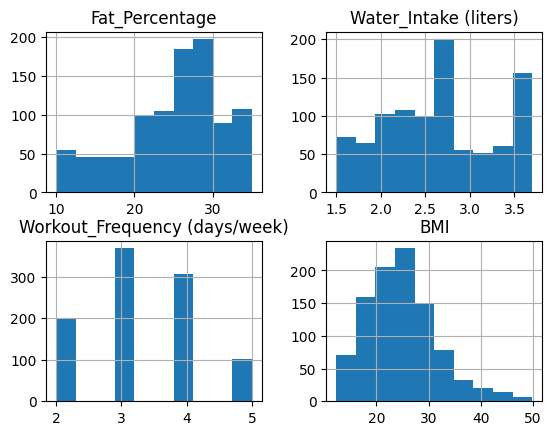

In [20]:
df_gym.hist(column=['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM'])
df_gym.hist(column=['Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned'])
df_gym.hist(column=['Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI'])
